# MATH GR 5320 Risk Calculation System
## Backup Version

### This notebook is used for demonstration only when the UI versions are unavailable! 

### All the instructions in final report is based on the complete version of system with intentionally designed UI.

### Click 'Kernel' then select 'Restart & Run all' to start  


### Load Packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_utils import *

%matplotlib inline

### User Inputs

In [2]:
Path = os.getcwd()                            # get current working directory, you may change this to a different location

Time_start = pd.Timestamp('1890-8-9')         # set time period for stock price data
Time_end = pd.Timestamp('2077-7-7')          

VaR_p = 0.99                                  # float [0, 1], level of VaR
ES_p = 0.975                                  # float [0, 1], level of ES

Initial_value = 10000.0                       # float > 0, total value of your portfolio
Window_length = 5.0                           # float > 0, number of years used for parameter estimatation
Horizon_period = 5                            # integer > 0, number of days used in defining VaR 

Parameter = 'Window'                          # 'Window' or 'Exponential'

### Sample Commands

In [3]:
# verify input
try:
    Check_input(Time_start, Time_end, VaR_p, ES_p, Initial_value, Window_length, Horizon_period, Parameter)
except AssertionError:
    print('Invalid inputs! Please check your setups')
else:
    print('Input validity check complete!')

Input validity check complete!


In [4]:
# read main, output data and parameters
try:
    Stocks, Options, Stock_Data, Option_Data, \
    Interest_Rate, P_Return, Long_P, Rho, P_Hist, \
    Time_start, Time_end, GBM_Stocks, GBM_Portfolio = \
    Read_Main(Path, Time_start, Time_end, Window_length, Horizon_period, Parameter)
except ValueError as err:
    print(err)

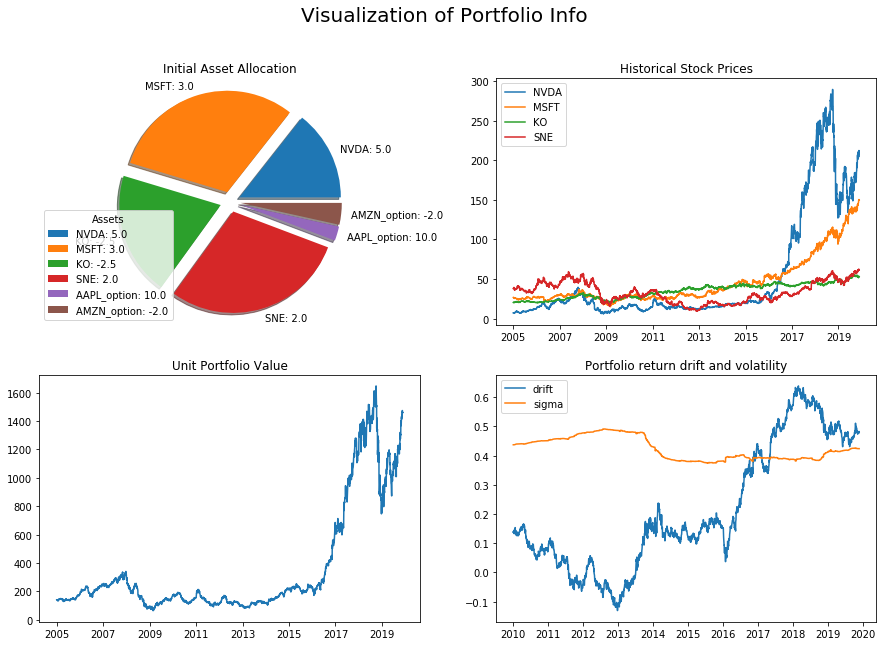

In [5]:
#Portfolio Info
Plot_Position(P_Return, Stock_Data, Option_Data, Stocks, Options, Interest_Rate, GBM_Portfolio)

In [6]:
# calculate VaR and ES, output two dataframe
VaR, ES, Loss, Exceptions = Calculate_Main(P_Return, P_Hist, Stock_Data, Option_Data, Stocks, Options, 
                             Rho, Interest_Rate, GBM_Stocks, GBM_Portfolio, Initial_value, 
                             Window_length, Horizon_period, VaR_p, ES_p, Long_P)

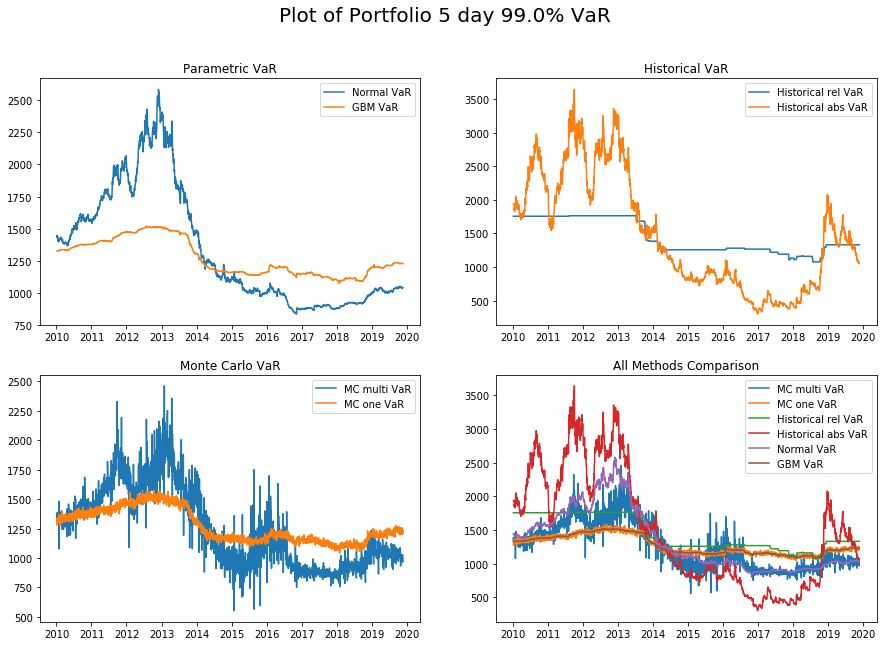

In [7]:
# Plot VaR
Plot_VaR(VaR, Stocks, Horizon_period, VaR_p)

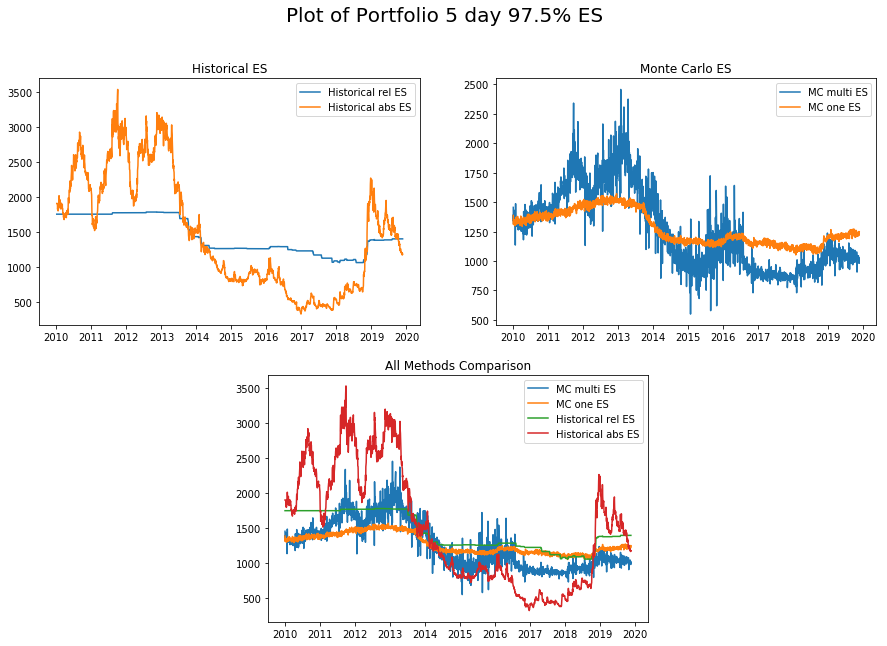

In [8]:
# Plot ES
Plot_ES(ES, Horizon_period, ES_p)

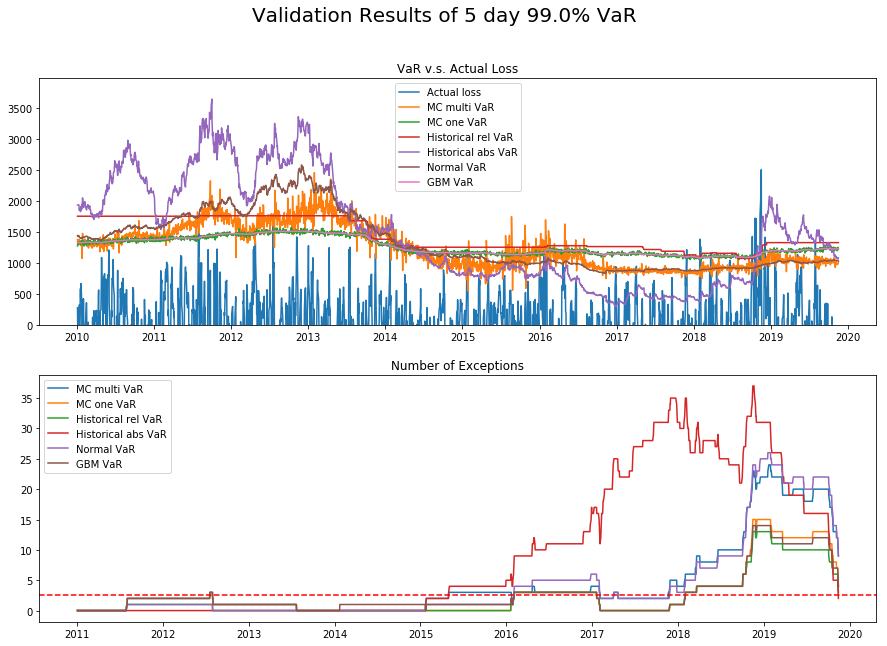

In [9]:
# plot valiadation results, return average exception number
Avg = Plot_Backtest(Loss, Exceptions, Horizon_period, VaR_p)

In [10]:
# average number of exceptions
Avg

MC multi VaR          4.364532
MC one VaR            2.511867
Historical rel VaR    2.025526
Historical abs VaR    9.366323
Normal VaR            4.262427
GBM VaR               2.624720
dtype: float64

In [11]:
print('The {} method has the lowest average number of exceptions.'.format(Avg.idxmin()))

The Historical rel VaR method has the lowest average number of exceptions.


In [12]:
# save results
#Save_Data(VaR, ES, Path)